<a href="https://colab.research.google.com/github/skyler-ud/MLTSA_SLindsey/blob/main/HW7/Another_copy_of_Clustering_businesstimeseries_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series clustering exercise

# Data

The data is on the github repo. It can also be gotten directly from the Census Boureau and from NYC open data.

Each file is the economic census for 1 year.
Download it programmatically and move it to PUIdata

data link https://github.com/fedhere/MLTSA_FBianco/blob/main/data/nyc_zpb_est_1994_2014.csv



make sure yuo read it so that the index column is the zipcode

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp
from sklearn.cluster import KMeans
import missingno as mno
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
import matplotlib as mpl

In [ ]:
# read in the business data: this is the number of licenced business per zipcode in NYC from 1994 through 2014
df = pd.read_csv("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/refs/heads/main/data/nyc_zpb_est_1994_2014.csv",index_col=0)
df.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
11436,51.0,50.0,53.0,51.0,51.0,58.0,65.0,57.0,78.0,74.0,...,82.0,80.0,84.0,90.0,92.0,98.0,101.0,57.0,99.0,109.0
11213,406.0,420.0,433.0,456.0,476.0,473.0,477.0,493.0,546.0,569.0,...,556.0,565.0,556.0,592.0,621.0,675.0,674.0,493.0,755.0,772.0
11212,505.0,494.0,502.0,527.0,519.0,541.0,520.0,527.0,577.0,581.0,...,587.0,570.0,587.0,602.0,647.0,699.0,713.0,527.0,731.0,752.0
11225,381.0,387.0,388.0,410.0,416.0,409.0,417.0,422.0,479.0,488.0,...,491.0,499.0,514.0,520.0,543.0,580.0,597.0,422.0,673.0,696.0
11218,985.0,1015.0,1049.0,1075.0,1118.0,1149.0,1161.0,1180.0,1228.0,1247.0,...,1332.0,1331.0,1377.0,1397.0,1457.0,1474.0,1523.0,1180.0,1687.0,1736.0


# Data cleaning

you may need to clean your data: for some NYC zip codes there may be no info
sanity check. you should have 21(N_timestamps) datapoints per time series and about 239 zipcodes (Nzipcodes)

- drop all rows with 10 missing values or more
- impute missing values using k nearest neighbors with k=5 (you can use AI prompts to do that)


mydata.shape should be (Nzipcodes, Ntimestamps)



In [ ]:
df.shape

(248, 21)

<Axes: >

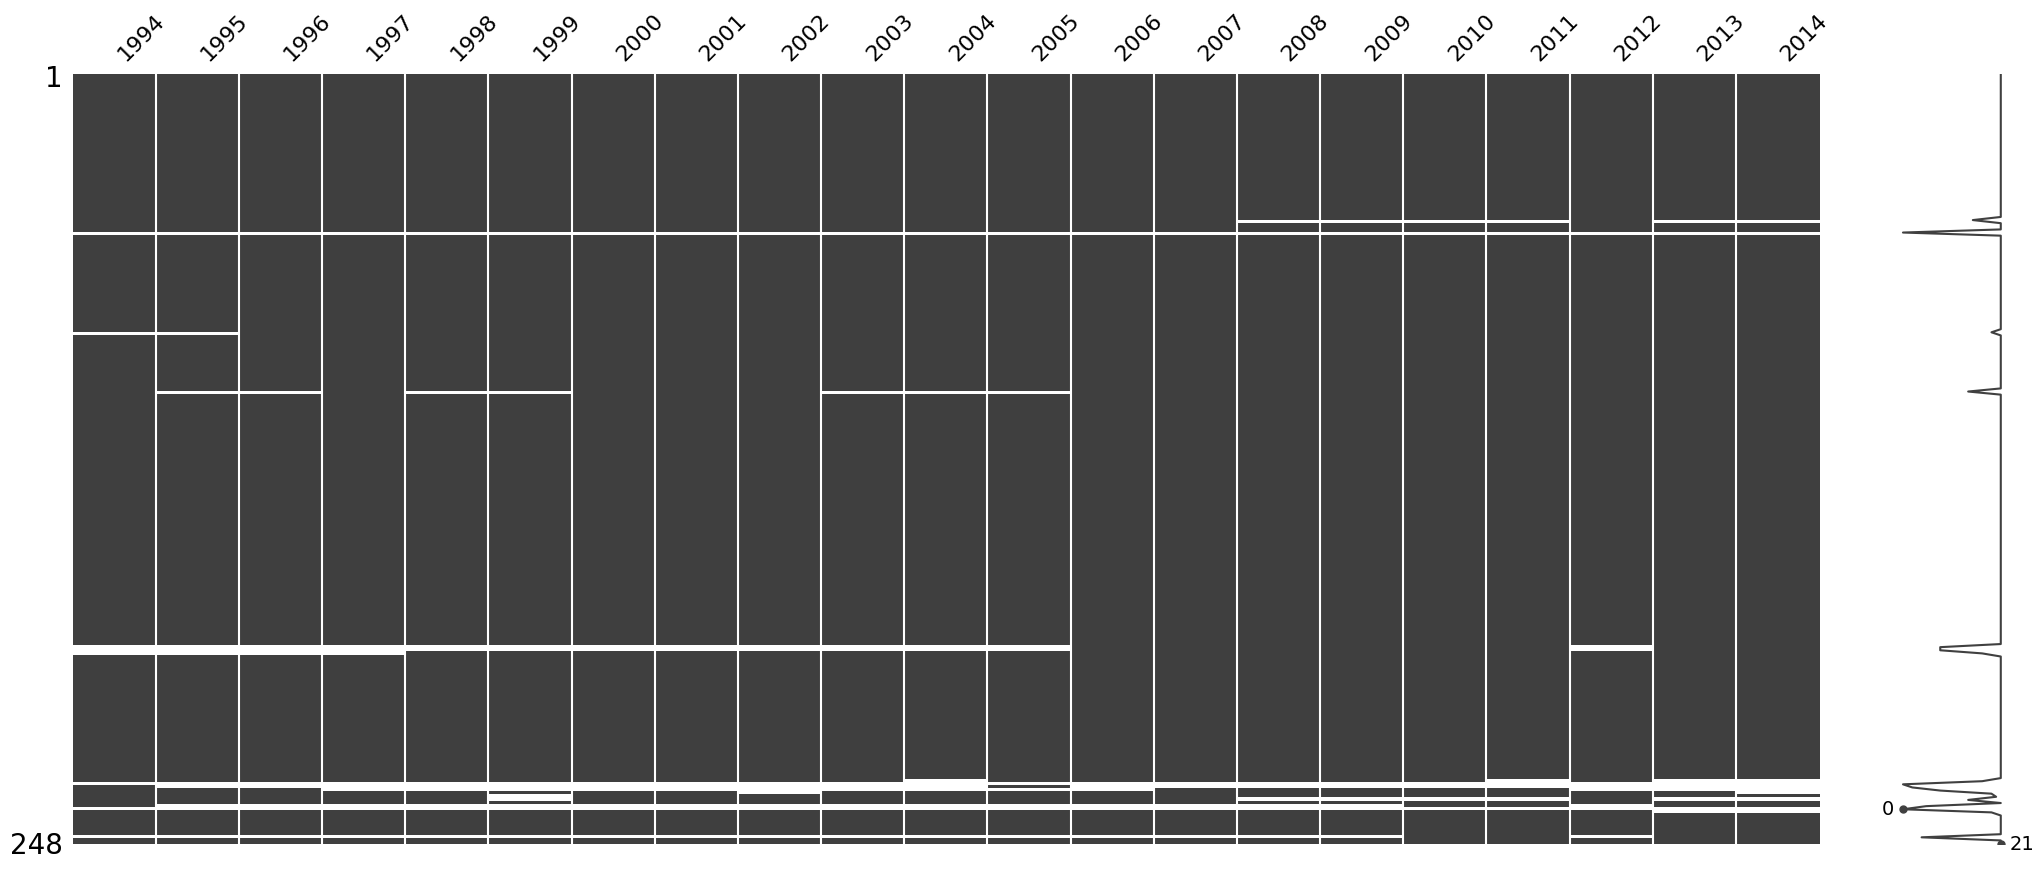

In [ ]:
mno.matrix(df)

**Figure 1:** Missing number of entries per time series. Large numbers of missing entries in a time series will be removed, and a few missing entries in a time series will be imputed to complete the time series.

In [ ]:
df.dropna(thresh=10,inplace=True)
df.shape

(239, 21)

<Axes: >

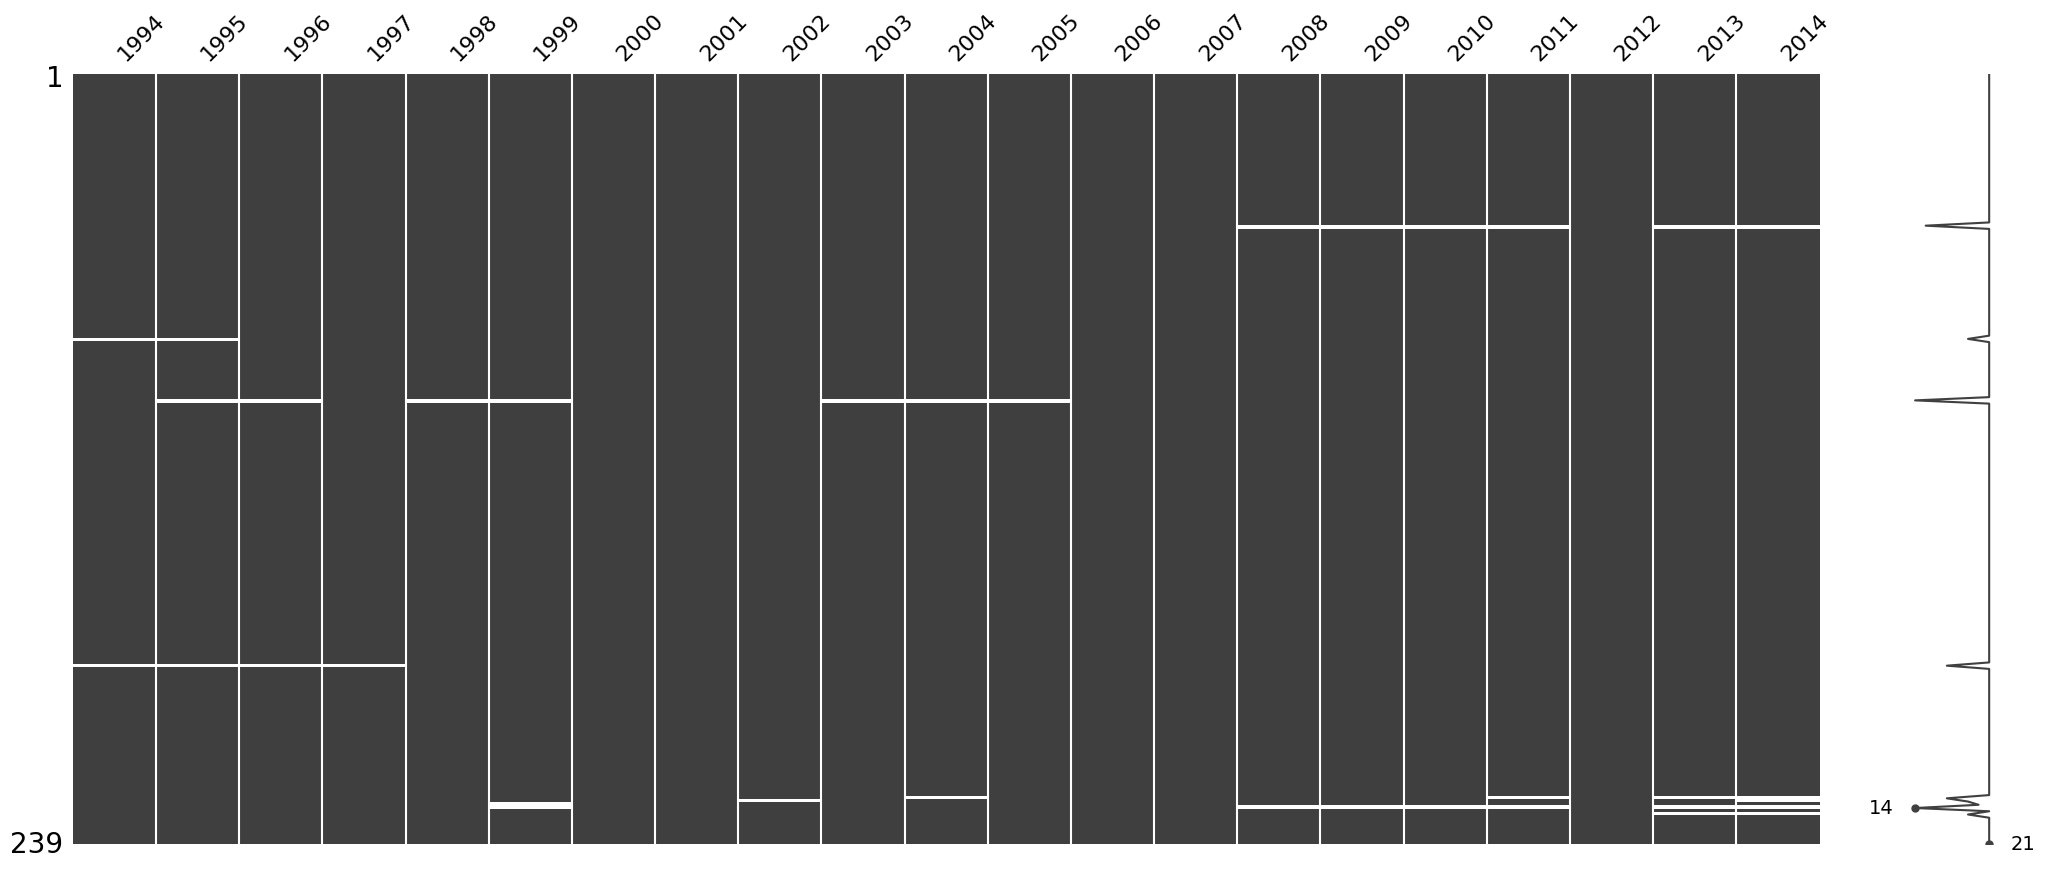

In [ ]:
mno.matrix(df)

**Figure 2:** Missing number entries per time series after removing time series with large amounts of missing data.

In [ ]:
# prompt: impute missing values with knearest neighbors

# Initialize KNN imputer with k=5
imputer = KNNImputer(n_neighbors=5)
# Fit and transform the data to impute missing values
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns = df.columns, index=df.index)

In [ ]:
df_imputed.shape

(239, 21)

<Axes: >

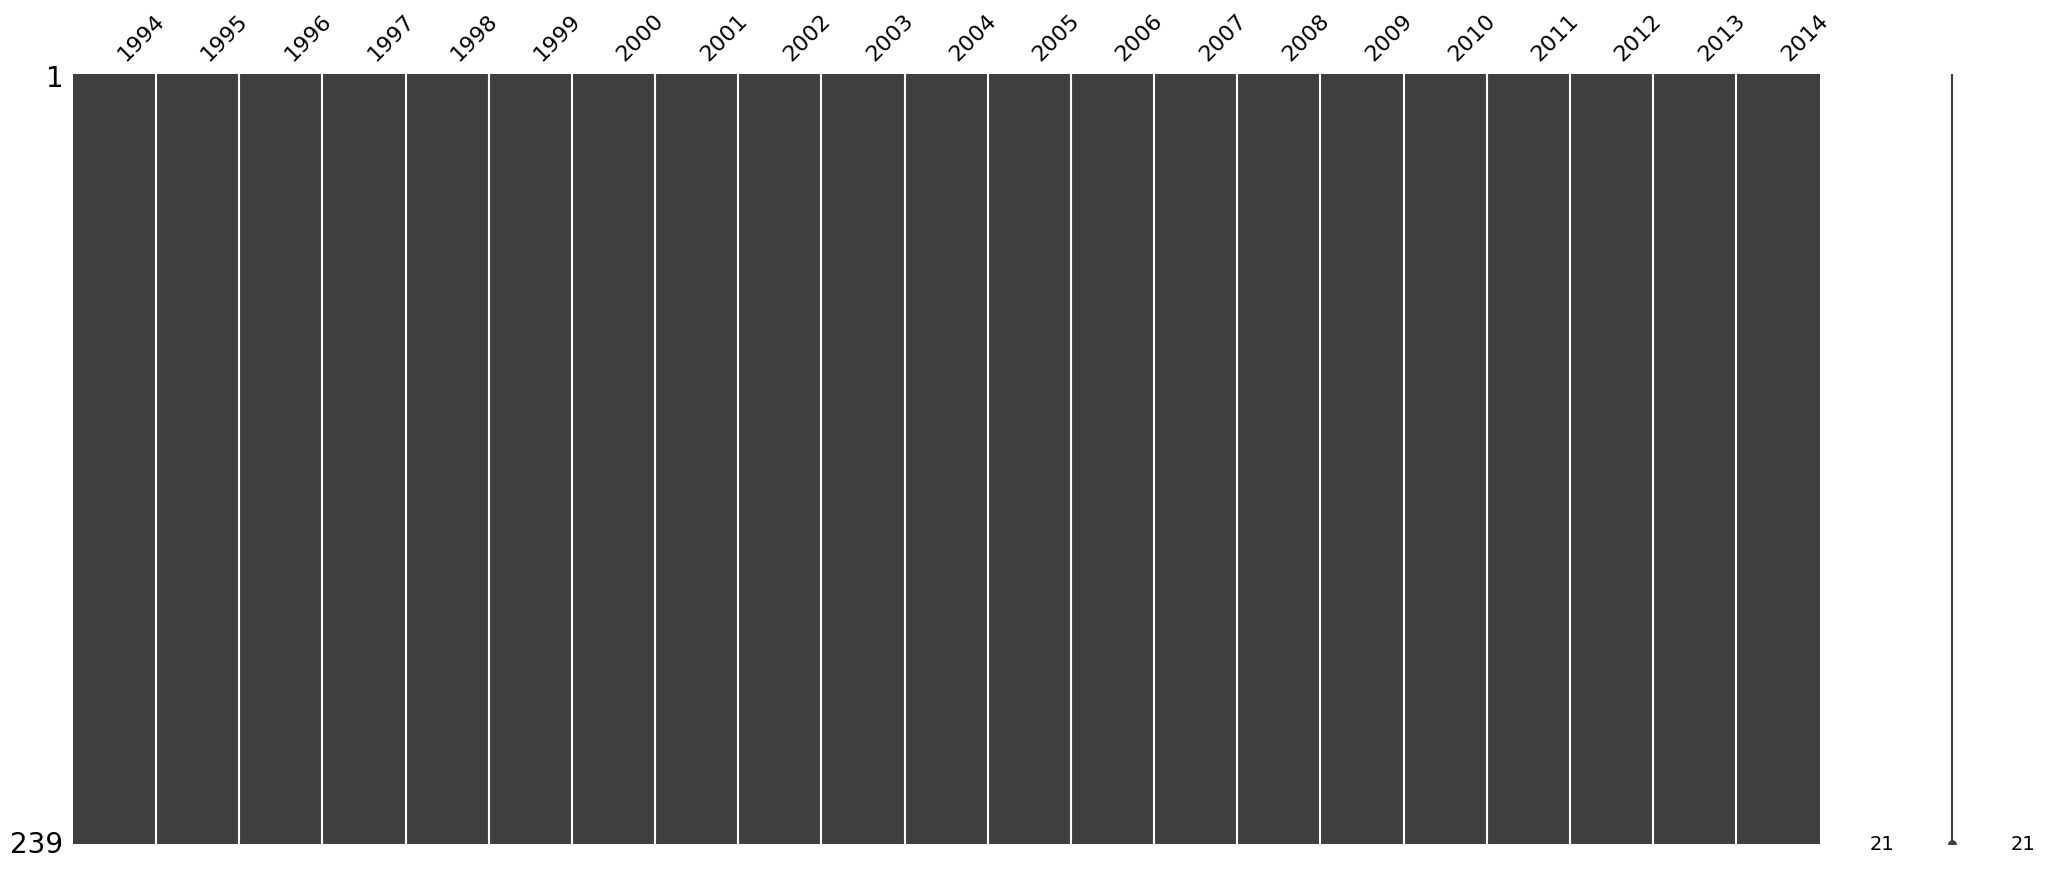

In [ ]:
mno.matrix(df_imputed)

**Figue 3:** Missing number entries per time series after removing time series with large amounts of missing data and imputing remaining missing data with a 5-nearest neighbors imputing method.

# get the zipcodes shape file
by cloning the repo https://github.com/wimlds/smart_cities.git


In [ ]:
!git clone 'https://github.com/wimlds/smart_cities.git'

fatal: destination path 'smart_cities' already exists and is not an empty directory.


original data (263, 13)
after cleaning (248, 13)
ZIPCODES: 248 POLYGONS: 248 the difference is due to island with same zip as parts of land, but disjoint shapes
number of NYC zip codes: 248


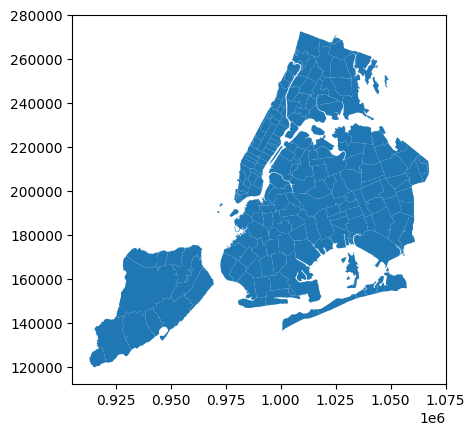

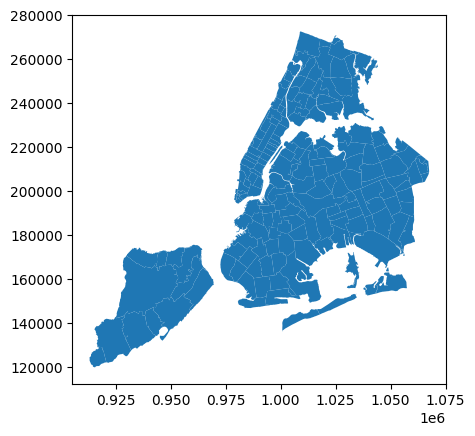

In [ ]:
#look at the code and the plots below : I am using geopandas to plot maps of zipcodes from a shapefile and I am removing duplicate entries that have the same zipcode

nyczipsshp = gp.read_file( "smart_cities/NYC_shapefiles/ZIP_CODE_040114.zip")
print("original data", nyczipsshp.shape)
nyczipsshp.plot()

nyczipsshp = nyczipsshp.drop_duplicates("ZIPCODE")
print("after cleaning", nyczipsshp.shape)
nyczipsshp.plot()

print("ZIPCODES:",
      len(np.unique(nyczipsshp.ZIPCODE)), "POLYGONS:",
      len(nyczipsshp.ZIPCODE),
      "the difference is due to island with same zip as parts of land,",
      "but disjoint shapes")
nyczips = nyczipsshp.ZIPCODE.values.astype(int)
print("number of NYC zip codes:", len(nyczips))

## TASKS:
    
    1. Scale and prep your data.
    2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means
    in **a few** clusters (as discussed there is no real good, sound way to
    decide what a good number is here. try a few options, keeping in mind
    a few is more than a couple, but i recommand you stay within the
    single digit numbers)
    
    3. plot the cluster centers (if you used K means those are the means of
    the clusters). you can plot for example the cluster centers overlayed on
    each time series (using the alpha channel to control the opacity in the
    plot may be helpful here).
    
    4. Use another clustering algorithm (of your choice)
    
    5. overlay your data on a NYC map: you can use shapefiles for the
    zip codes and different colors for different clusters
    
    6. Compare the results of the 2 algorithms
    
    7. attempt an interpretation. this is dangerous ground: clustering is
    an exploratory tool so you do not want to jump to conclusions because
    you see some clusters! but seeing structure in your data can inform
    your next moves as an investigator.
    

Note on preprocessing: the preparation of these data should include the "standardization" of the time seris.
*Always when you apply a moachine learning model you should standardize the data or whiten it.*
These operations may be complicated preprocessing operation, they can for example invoke PCA, and they are aimed at removing covariance in the feature space.

The simplest version of whitening *standardizes each feature*" from every column (feature) you subtract the mean and you divide it by the standard deviation.

But the time series preprocessing is different if you want to use each time stamp as feature: because you want to maintain the coherence of the data, i.e. you **do not want** to treat each feature as an independent feature! the pattenrs in the time series are what you are clustering on (time series goes up and down, creating a pattern) and those patterns would be lost by whitening.

*So when you cluster or otherwise use a time series in a model, using each timestamp as a feature, you want to standardize the observations, not the features.*

**From each row of your table (observation, in this case each zipcode) subtract the mean and you divide the row by the standard deviation.**

In [ ]:
scaler = StandardScaler()

data_t = df_imputed.transpose()
scaled_data_t = scaler.fit_transform(data_t)
vals = scaled_data_t.transpose()
scaler.mean_

array([7.44761905e+01, 5.51333333e+02, 5.85428571e+02, 4.86857143e+02,
       1.28552381e+03, 1.01100000e+03, 2.23095238e+03, 8.65809524e+02,
       1.82409524e+03, 1.68838095e+03, 3.91333333e+02, 2.85238095e+02,
       5.86476190e+02, 9.87095238e+02, 9.85095238e+02, 3.16714286e+02,
       1.48619048e+02, 5.98476190e+02, 7.24142857e+02, 9.92142857e+02,
       5.26333333e+02, 9.15285714e+02, 9.77476190e+02, 5.03285714e+02,
       5.45523810e+02, 4.57238095e+02, 1.17271429e+03, 6.72523810e+02,
       4.37571429e+02, 6.86571429e+02, 5.92142857e+02, 4.82428571e+02,
       4.64285714e+02, 5.70047619e+02, 1.31571429e+02, 4.94619048e+02,
       7.25952381e+02, 3.21952381e+02, 2.10952381e+02, 8.24095238e+02,
       6.05238095e+02, 5.83000000e+02, 1.64571429e+02, 1.92561905e+03,
       5.33047619e+02, 2.71714286e+02, 4.68285714e+02, 5.87133333e+02,
       1.85004762e+03, 8.72238095e+02, 7.96285714e+02, 6.25190476e+02,
       6.38095238e+00, 3.50285714e+02, 8.38619048e+02, 1.63909524e+03,
      

In [ ]:
vals.shape
vals.mean(axis=1), vals.mean(axis=1).shape

(array([-2.85485921e-16, -3.38353684e-16, -2.11471052e-16,  3.38353684e-16,
        -4.86383420e-16, -2.11471052e-17,  6.66133815e-16, -4.75809868e-16,
         1.16309079e-16,  4.01794999e-16,  8.24737104e-16, -3.38353684e-16,
        -3.17206578e-16,  3.38353684e-16,  4.86383420e-16, -2.32618158e-16,
        -2.85485921e-16, -7.40148683e-17,  5.07530526e-16,  7.61295788e-16,
        -8.88178420e-16, -8.56457762e-16, -1.05735526e-16,  2.11471052e-16,
         1.48029737e-16, -6.34413157e-17, -1.20538500e-15,  8.45884209e-17,
         2.53765263e-16,  2.43191710e-16,  3.91221447e-16, -1.79750394e-16,
         2.11471052e-16,  1.16309079e-16, -3.27780131e-16,  6.34413157e-16,
        -2.32618158e-16, -4.01794999e-16, -4.01794999e-16,  2.74912368e-16,
         9.72766841e-16,  9.51619735e-17, -4.22942105e-16, -9.04038749e-16,
         2.32618158e-16, -6.34413157e-17,  1.05735526e-16,  8.98751972e-17,
         3.17206578e-17,  9.72766841e-16, -3.48927236e-16,  5.18104078e-16,
        -1.7

In [ ]:
vals.std(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

vals.mean(axis=1) should return 0 (or something very small) everywhere [done]

vals.mean(axis=1).shape should be (248,) (Note from Skyler, not sure about this. After removing some data, seems like our set is 239)

vals.std(axis=1) should return 1 everywhere [done]



# KM Clustering

create a kmeans model with 5 clusters

In [ ]:
nc = 5
km = KMeans(n_clusters=nc, random_state=302).fit(vals)


### Plot and map the clusters.

First reflect on this: the center of a cluster is a point within the cluster. If your cluster is a cluster of time series its center is... A TIME SERIES! so your cluster centers should be time series of 21 points (1995-2015)

The cluster centers are extracted as km.center

In [ ]:
km.cluster_centers_.shape

(5, 21)

In [ ]:
# testing output of km.cluster_centers_

In [ ]:
# testing output of km.cluster_centers_[1]

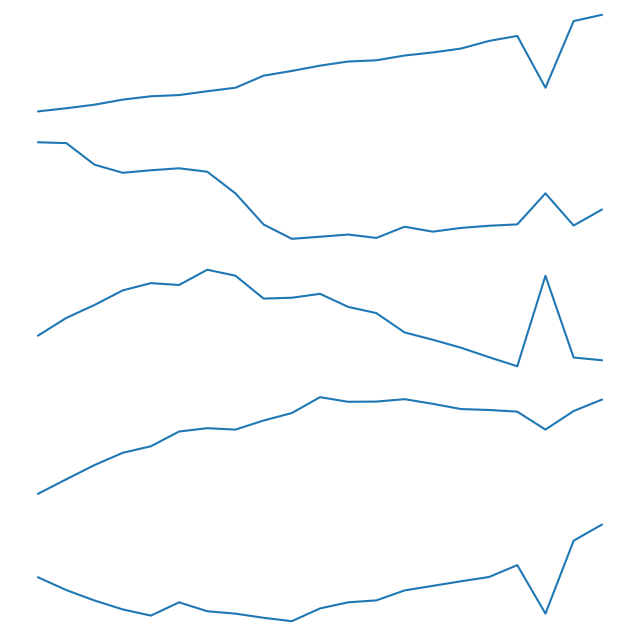

In [ ]:
#plot just the centers here
fig, axs = plt.subplots(5, 1, figsize=(8,8))

for i,c in enumerate(km.cluster_centers_):
    axs[i].plot(c, color = 'tab:blue', alpha = 1.0) # plots the cluster center

    axs[i].set_axis_off()

    # plt.axis('off')

**Figure 4:** Centers for each cluster after being run through a K-Means clustering algorithm. The four clusters all have differing behavior except at the end, where each cluster experiences a large shift in their centers.

Then plot also the time series that belong to the cluster, overplotting them on the cluster center (cluster center in blue, alpha=1, time series in black, alpha=0.3). The time series in a cluster can be found as km.labe

In [ ]:
# testing km.labels_

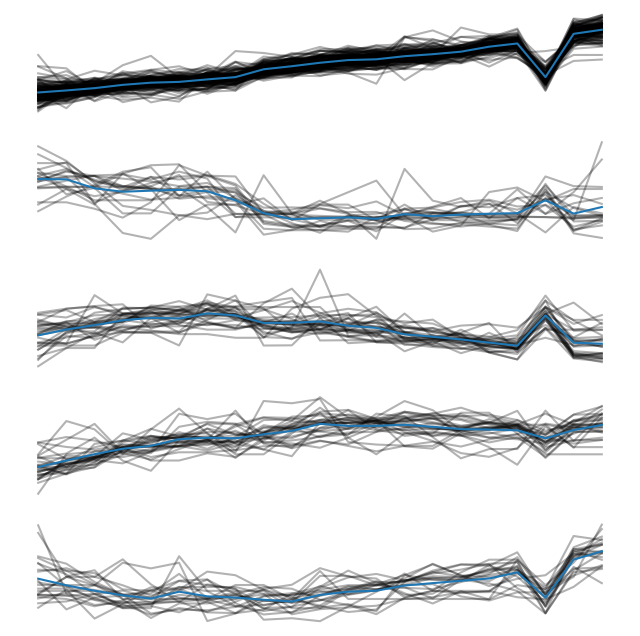

In [ ]:
fig, axs = plt.subplots(5, 1, figsize=(8,8))

for i,c in enumerate(km.cluster_centers_):

    # Plot all data points in cluster i
    for sample in vals[km.labels_ == i]:
        axs[i].plot(sample, color='black', alpha=0.3)

    axs[i].plot(c, color = 'tab:blue', alpha = 1.0) # plots the cluster center

    axs[i].set_axis_off()

**Figure 5:** Individual time series (black) and cluster center (blue) plotted simultaneously.Cluster 0, the cluster shown at the top of the figure, has the highest number of members, while cluster 4, shown at the bottom, shows the lowest number of members.

Map the zipcodes by color according to the cluster center - you can make a single map in 5 color or 5 maps in 1 color each


In [ ]:
#create a dataframe with the cluster id per zipcode
clustersdf = pd.DataFrame()
clustersdf['ZIPCODE'] = df_imputed.index.astype(str)
clustersdf['cluster'] = km.labels_
clustersdf.head()

,ZIPCODE,cluster
0,11436,0
1,11213,0
2,11212,0
3,11225,0
4,11218,0


In [ ]:
#merge it with the geodataframe with the zipcode shapes- I am losing 1 zipcode...
mergednyz = nyczipsshp.merge(clustersdf, on='ZIPCODE', how='inner')
print("length of dataframes:",
      len(mergednyz.ZIPCODE),
      len(np.unique(clustersdf.ZIPCODE)), len(np.unique(nyczipsshp.ZIPCODE)))

length of dataframes: 239 239 248


Note from Yuca: from earlier preprocessing, it seems like we are losing ~9 zipcodes here instead of one (that the professor loses in her homework setup)

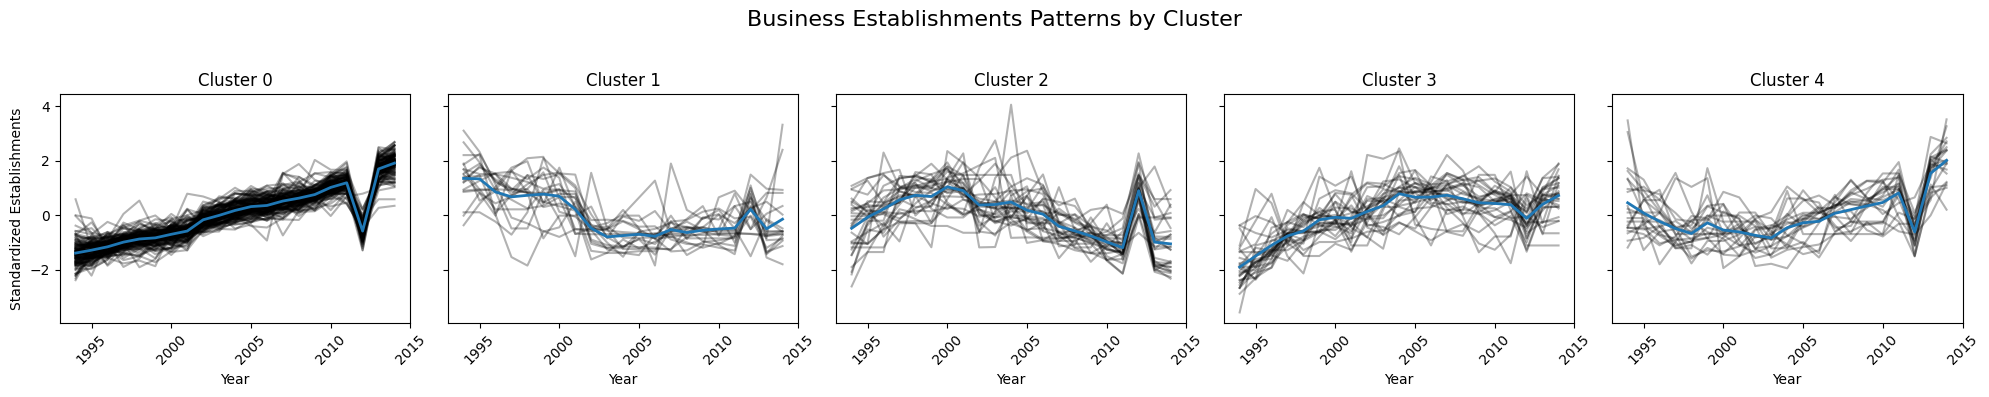

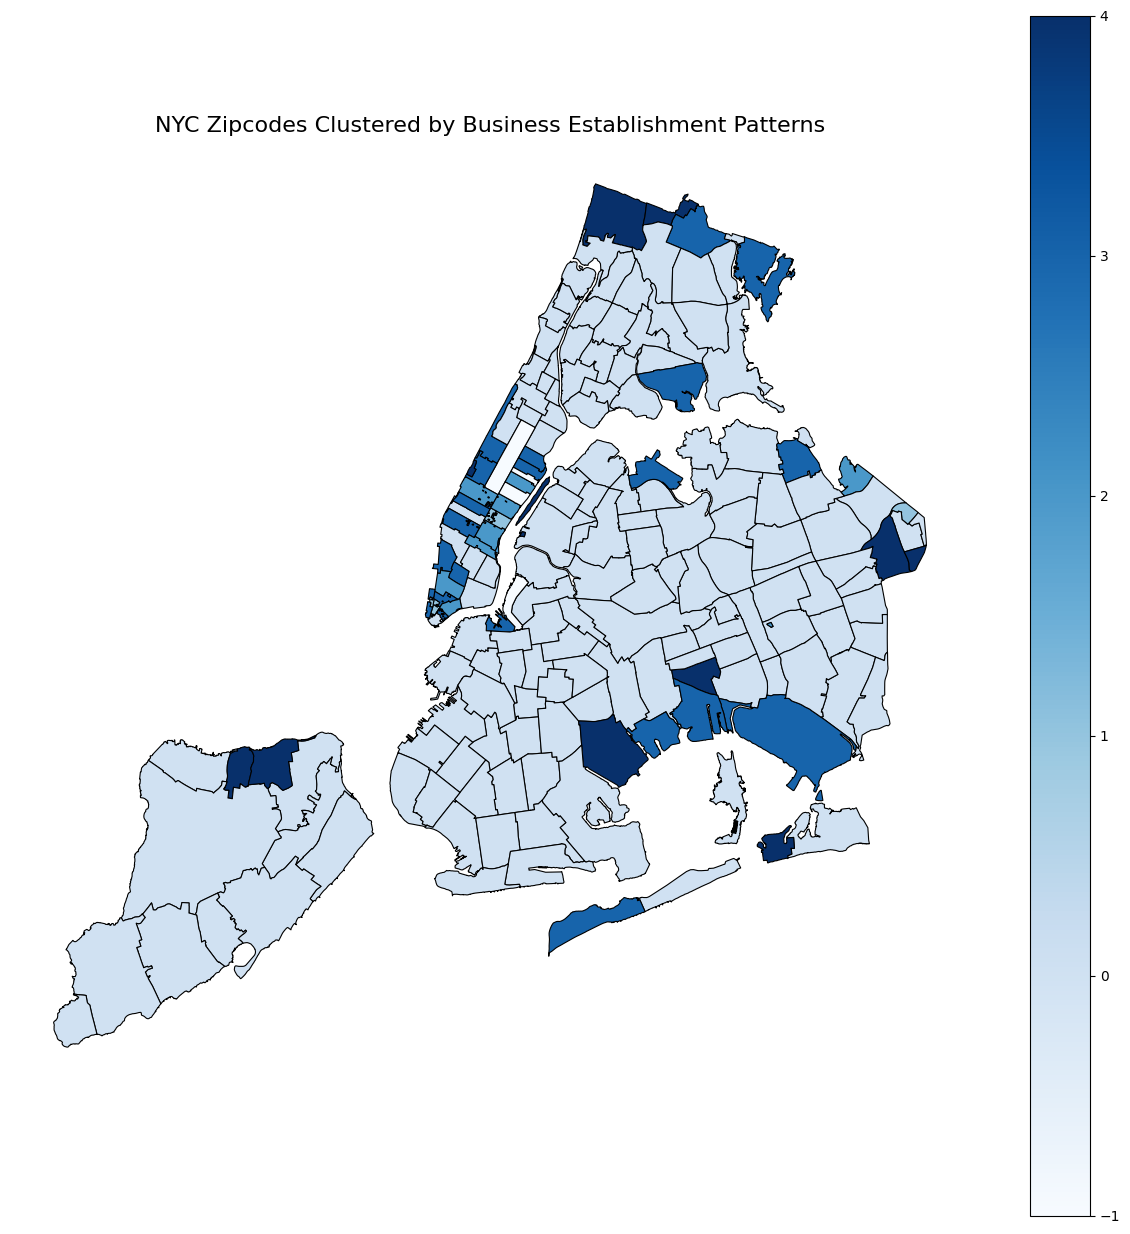

In [ ]:
# Improved Timeseries Cluster Plot
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# --- Plot Timeseries per Cluster ---
fig, axs = plt.subplots(1, nc, figsize=(20, 4), sharey=True)

years = np.arange(1994, 2015, 1)

for i, (ax, center) in enumerate(zip(axs, km.cluster_centers_)):
    for v in vals[km.labels_ == i]:
        ax.plot(years, v, color='black', alpha=0.3)
    ax.plot(years, center, color='tab:blue', linewidth=2)
    ax.set_title(f"Cluster {i}", fontsize=12)
    ax.set_xticks([1995, 2000, 2005, 2010, 2015])
    ax.tick_params(axis='x', labelrotation=45)
    ax.grid(False)
    ax.set_xlabel("Year", fontsize=10)
    if i == 0:
        ax.set_ylabel("Standardized Establishments", fontsize=10)

plt.suptitle("Business Establishments Patterns by Cluster", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# --- Merge Correctly to Preserve All Zipcodes ---
mergednyz = nyczipsshp.merge(clustersdf, on='ZIPCODE', how='left')
mergednyz['cluster'] = mergednyz['cluster'].fillna(-1).astype(int)

# --- Plot Choropleth Map ---
fig, ax = plt.subplots(figsize=(12, 12))

cmap = mpl.cm.Blues
vmin = mergednyz['cluster'].min()
vmax = mergednyz['cluster'].max()
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

mergednyz.plot(
    column='cluster',
    cmap=cmap,
    norm=norm,
    linewidth=0.8,
    edgecolor='black',
    legend=True,
    ax=ax
)

ax.set_title("NYC Zipcodes Clustered by Business Establishment Patterns", fontsize=16)
ax.set_aspect('equal')
ax.axis('off')

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.show()


**Figure 6:** Clusters found in Figure 5 on a color map of the zipcodes they depict. Some geographical grouping can be observed. The largest cluster can be easily seen as cluster 0, matching the density in Figure 5.

### Figure 3:
cloropleth of  cluster centers for 5 k-means clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster. The business pattern time series are plotted at the top.

Can you parse some business and socioeconomic dynamics from this plot?

create 8 kmeans models with 2-10 cluster centers. put each model in a list

(array([0, 1], dtype=int32), array([183,  56]))
(array([0, 1, 2], dtype=int32), array([180,  26,  33]))
(array([0, 1, 2, 3], dtype=int32), array([150,  26,  32,  31]))
(array([0, 1, 2, 3, 4], dtype=int32), array([142,  19,  29,  28,  21]))
(array([0, 1, 2, 3, 4, 5], dtype=int32), array([142,  20,  25,   7,  21,  24]))
(array([0, 1, 2, 3, 4, 5, 6], dtype=int32), array([138,  20,  22,   9,  17,  25,   8]))
(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32), array([136,  22,  14,  13,  10,  17,  19,   8]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32), array([96, 22, 13, 12, 10, 11, 16,  8, 51]))


Text(0, 0.5, 'Inertia')

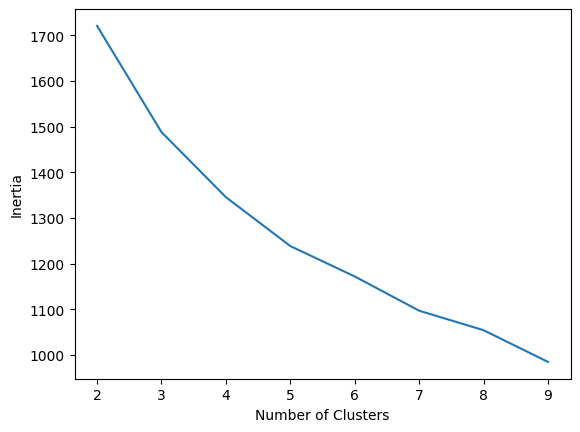

In [ ]:
kms = []

for nc in range(2,10):
  #cluster with kmeans
  kms.append(KMeans(n_clusters=nc, random_state=302).fit(vals))


#each observation in the km object has a label:
#that is the cluster assigned to that observation
for km in kms:
  print(np.unique(km.labels_, return_counts=True))


import pylab as plt
# note from yuca: from documentation website,
# "inertia (float): Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided."
plt.plot(range(2,10), [km.inertia_ for km in kms])
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

**Figure 7:** Inertia vs. Number of Clusters plot. This test, sometimes called the "Elbow Test", is commonly used to inform the number of clusters to define. This is inconclusinve, as no "elbow" (a sharp change to a slope of zero) is seen. The sharpest change in the slope toward zero occurs at 7 clusters, suggesting that 7 clusters may be a closer to correct number of clusters to define.

QUESTION: was the number 5 clusters justified by the data? explain

### or maybe like this, depending on which algorithm you use, and how you proceed to preprocess your data and how you cluster it. There is no one correct answer, but general trends should be retrieved.

# repeating the exercise using DBSCAN or hyerarchical agglomerative clustring...

In [ ]:
# note from Yuca: trying DBSCAN, you do not specify the number of clusters you want for the way DBSCAN works
# since DBSCAN "finds core samples of high density and expands clusters from them" (from their documentation online)
# documentation: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

from sklearn.cluster import DBSCAN

"""
epsfloat, default=0.5
The maximum distance between two samples for one to be considered as in the neighborhood of the other.
This is not a maximum bound on the distances of points within a cluster.
This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

min_samplesint, default=5
The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.
If min_samples is set to a higher value, DBSCAN will find denser clusters, whereas if it is set to a lower value, the found clusters will be more sparse.
"""


db = DBSCAN(eps=3.5, min_samples=2).fit(vals)

For eps = 3.5 and min_samples = 2:

In [ ]:
db.core_sample_indices_.shape

(221,)

In [ ]:
print(db.core_sample_indices_)

[  0   1   2   3   4   5   6   7   8   9  10  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  94
  95  96  97  98  99 100 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 189 192 193 194 195 196 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 218 219 224 226 227 228 229 230 231
 232 233 234 236 238]


In [ ]:
db.components_.shape

(221, 21)

In [ ]:
db.labels_.shape

(239,)

In [ ]:
db.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,
       -1, -1, -1,  0, -1

[ 0 -1]


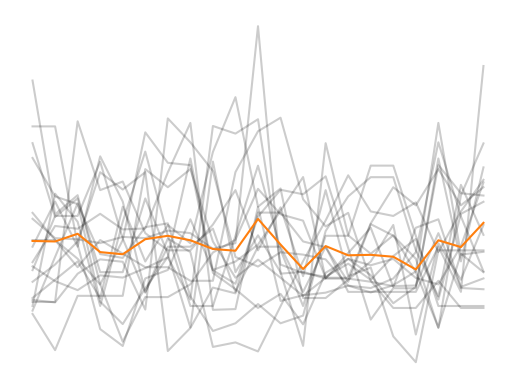

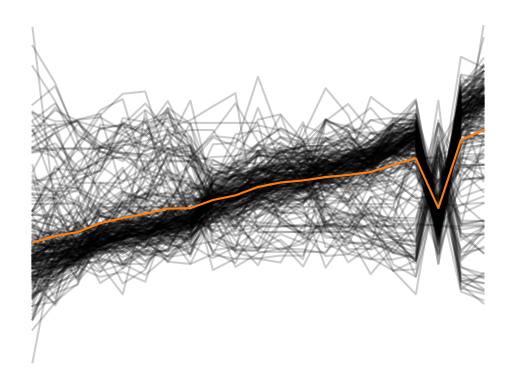

In [ ]:
# Get cluster labels
labels = db.labels_

# Add cluster labels to the DataFrame
vals_pd = pd.DataFrame(vals)
vals_pd['cluster'] = labels
print(vals_pd['cluster'].unique())

# Now you can analyze the clusters as you did with KMeans
# For example:
# Visualize clusters
# ax = vals_pd[vals_pd.cluster == -1].drop("cluster", axis=1).T.plot(legend=False, color="k", alpha=0.2)
for l in range(-1, vals_pd['cluster'].max()+1):
    if len(vals_pd[vals_pd.cluster == l]) == 0:
        continue

    vals_pd[vals_pd.cluster == l].drop("cluster", axis=1).T.plot(legend=False, color='black', alpha=0.2)

    cluster_data = vals_pd[vals_pd.cluster == l].drop("cluster", axis=1)
    cluster_center = cluster_data.mean(axis=0)
    plt.plot(cluster_center.values, color='tab:orange', alpha=1.0)
    plt.axis('off')
    plt.show()

    # cluster_center = vals_pd[vals_pd.cluster == l].mean(axis=0)  # Calculate the "center" of the cluster
    # axs[i].plot(cluster_center, color='tab:orange', alpha=1.0)  # Plot the cluster "center"

**Figure 8:** Clustering by a heirarchical alroithm (DBSCAN). Hyperparameters chosen were: eps = 3.5, min_samples = 2. Cluster 0 (top) is mostly outliers, and cluster 1 (bottom) is a cluster of similar time series.

In [ ]:
#create a dataframe with the cluster id per zipcode
clustersdf = pd.DataFrame()
clustersdf['ZIPCODE'] = df_imputed.index.astype(str)
clustersdf['cluster'] = db.labels_
clustersdf.head()

,ZIPCODE,cluster
0,11436,0
1,11213,0
2,11212,0
3,11225,0
4,11218,0


In [ ]:
#merge it with the geodataframe with the zipcode shapes- I am losing 1 zipcode...
mergednyz = nyczipsshp.merge(clustersdf, on='ZIPCODE', how='inner')
print("length of dataframes:",
      len(mergednyz.ZIPCODE),
      len(np.unique(clustersdf.ZIPCODE)), len(np.unique(nyczipsshp.ZIPCODE)))

length of dataframes: 239 239 248


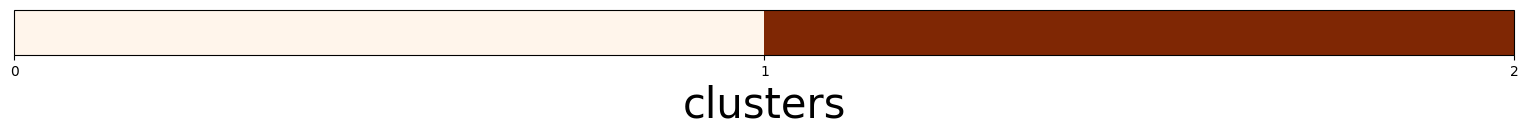

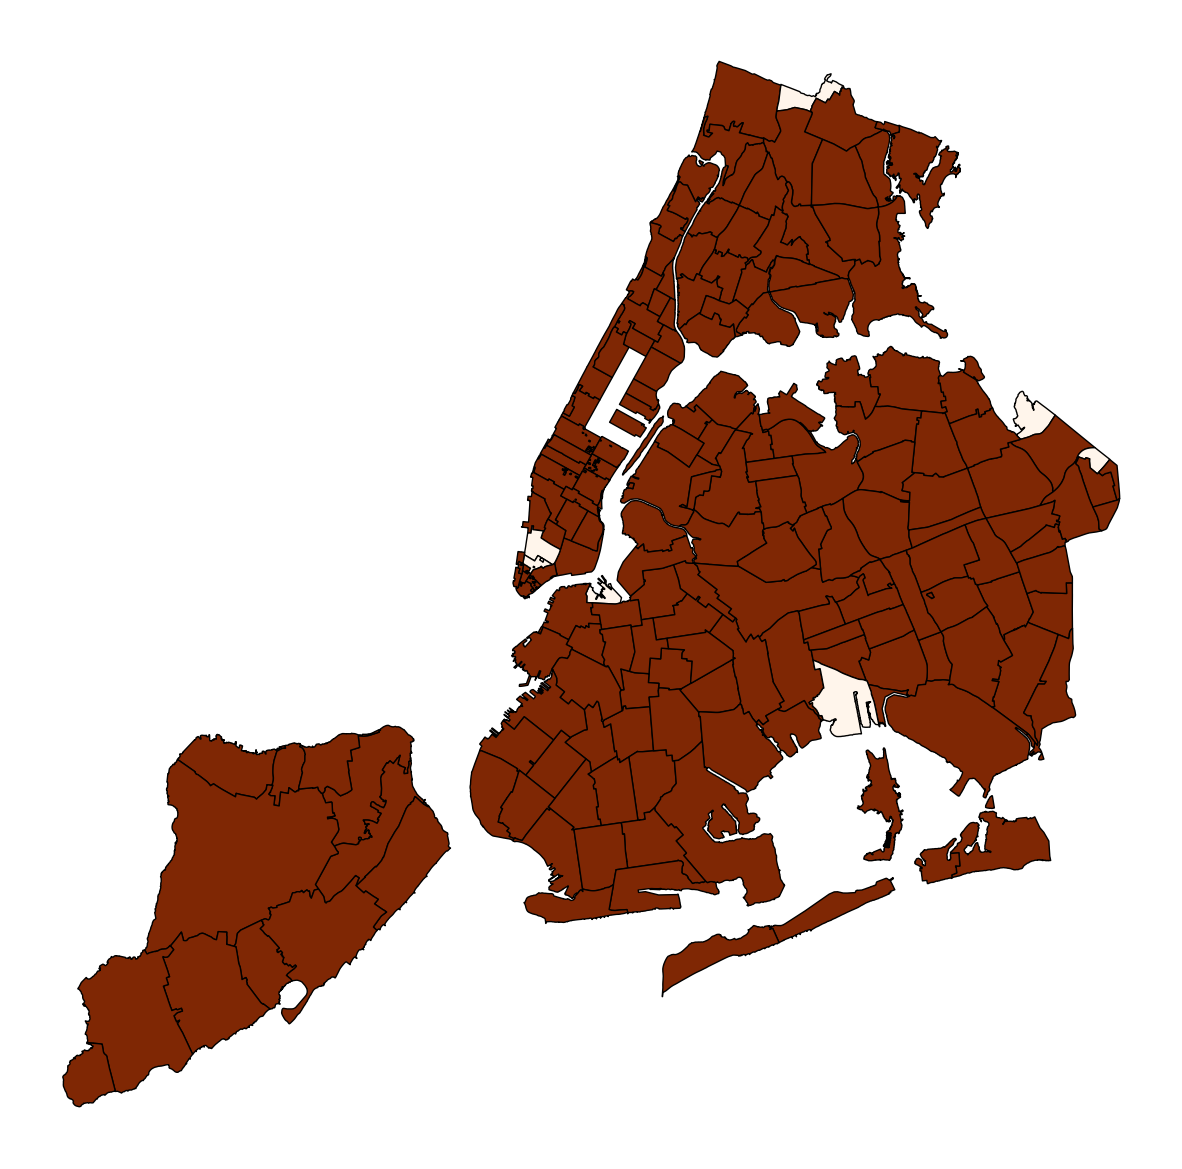

In [ ]:
# import matplotlib as mpl
# fig = plt.figure(figsize=(10, 5))
# for i, Xc in enumerate(km.cluster_centers_):
#     ax = fig.add_subplot(5, 2, (i + 1))

#     for v in vals[km.labels_ == i]:
#         ax.plot(np.arange(1994, 2015, 1), v, 'k-', alpha=0.3)
#     ax.text(2014.5, 1, "%d" % i)

#     plt.xticks(fontsize=10)
#     ax.set_yticklabels(['' * len(ax.get_xticklabels())])
#     ax.plot(np.arange(1994, 2015, 1), Xc, lw=3)
#     plt.grid(False)
#     plt.axis('off')
fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_axes([0.05, 1.0, 1, 0.15])
cmap = mpl.cm.Oranges
norm = mpl.colors.Normalize(vmin=0, vmax=5)

#adding a color bar to identify the clusters on the map
# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar.
bounds = range(2 + 1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb3 = mpl.colorbar.ColorbarBase(
    ax1,
    cmap=cmap,
    norm=norm,
    ticks=bounds,
    spacing='uniform',
    orientation='horizontal')
cb3.set_label('clusters', fontsize=30)
ax = plt.figure(figsize=(15, 15)).add_subplot(111)
mergednyz.plot(column='cluster', cmap='Oranges', alpha=1, ax=ax, ec='k')
tmp = ax.axis('off')

**Figure 9:** Geographical deipiction of the clustering done is Figure 8. Zip codes depicted in brown are those that are all similar, while zip codes depicted in tan are outliers.

For eps = 2.5 and min_samples = 2:

[ 0 -1  1  2]


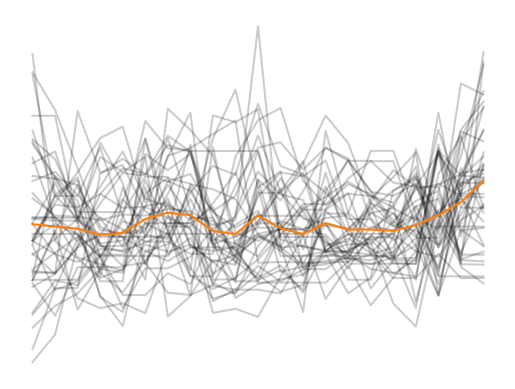

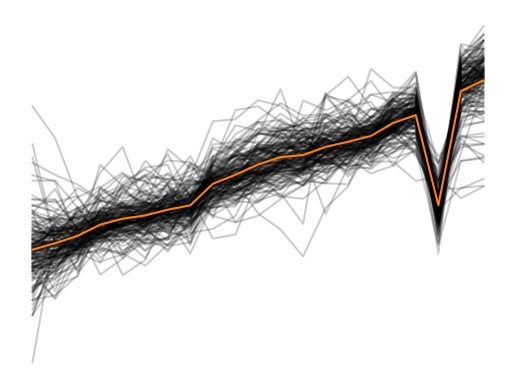

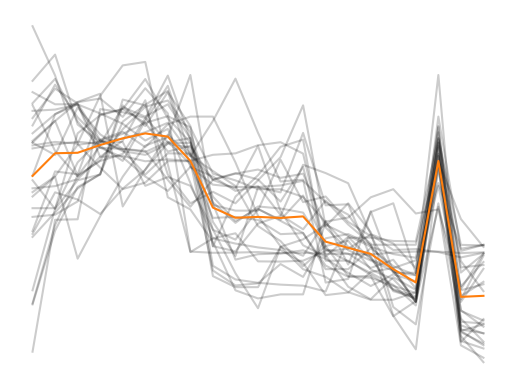

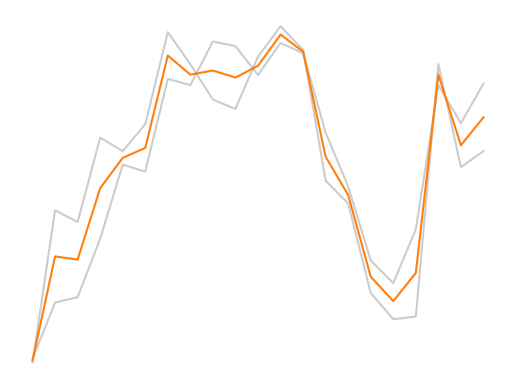

In [ ]:
db = DBSCAN(eps=2.5, min_samples=2).fit(vals)

# Get cluster labels
labels = db.labels_

# Add cluster labels to the DataFrame
vals_pd = pd.DataFrame(vals)
vals_pd['cluster'] = labels
print(vals_pd['cluster'].unique())

# Now you can analyze the clusters as you did with KMeans
# For example:
# Visualize clusters
# ax = vals_pd[vals_pd.cluster == -1].drop("cluster", axis=1).T.plot(legend=False, color="k", alpha=0.2)
for l in range(-1, vals_pd['cluster'].max()+1):
    if len(vals_pd[vals_pd.cluster == l]) == 0:
        continue

    vals_pd[vals_pd.cluster == l].drop("cluster", axis=1).T.plot(legend=False, color='black', alpha=0.2)

    cluster_data = vals_pd[vals_pd.cluster == l].drop("cluster", axis=1)
    cluster_center = cluster_data.mean(axis=0)
    plt.plot(cluster_center.values, color='tab:orange', alpha=1.0)
    plt.axis('off')
    plt.show()

    # cluster_center = vals_pd[vals_pd.cluster == l].mean(axis=0)  # Calculate the "center" of the cluster
    # axs[i].plot(cluster_center, color='tab:orange', alpha=1.0)  # Plot the cluster "center"

**Figure 10:** Similar to Figure 8, this plot shows the clustering by DBSCAN with parameters eps = 2.5 and min_sample = 2. A total of 5 clusters were found with these parameters. Similar patterns were found with K-Means clustering, with a spike near the end of the cluseter's center time series, except for Cluster 0, which appears to be outliers. This plot demonstrates the sensitivity that hierarchical clustering algorithms are to hyperparameters.

length of dataframes: 239 239 248


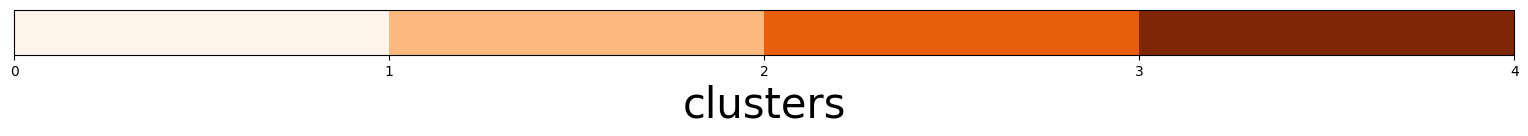

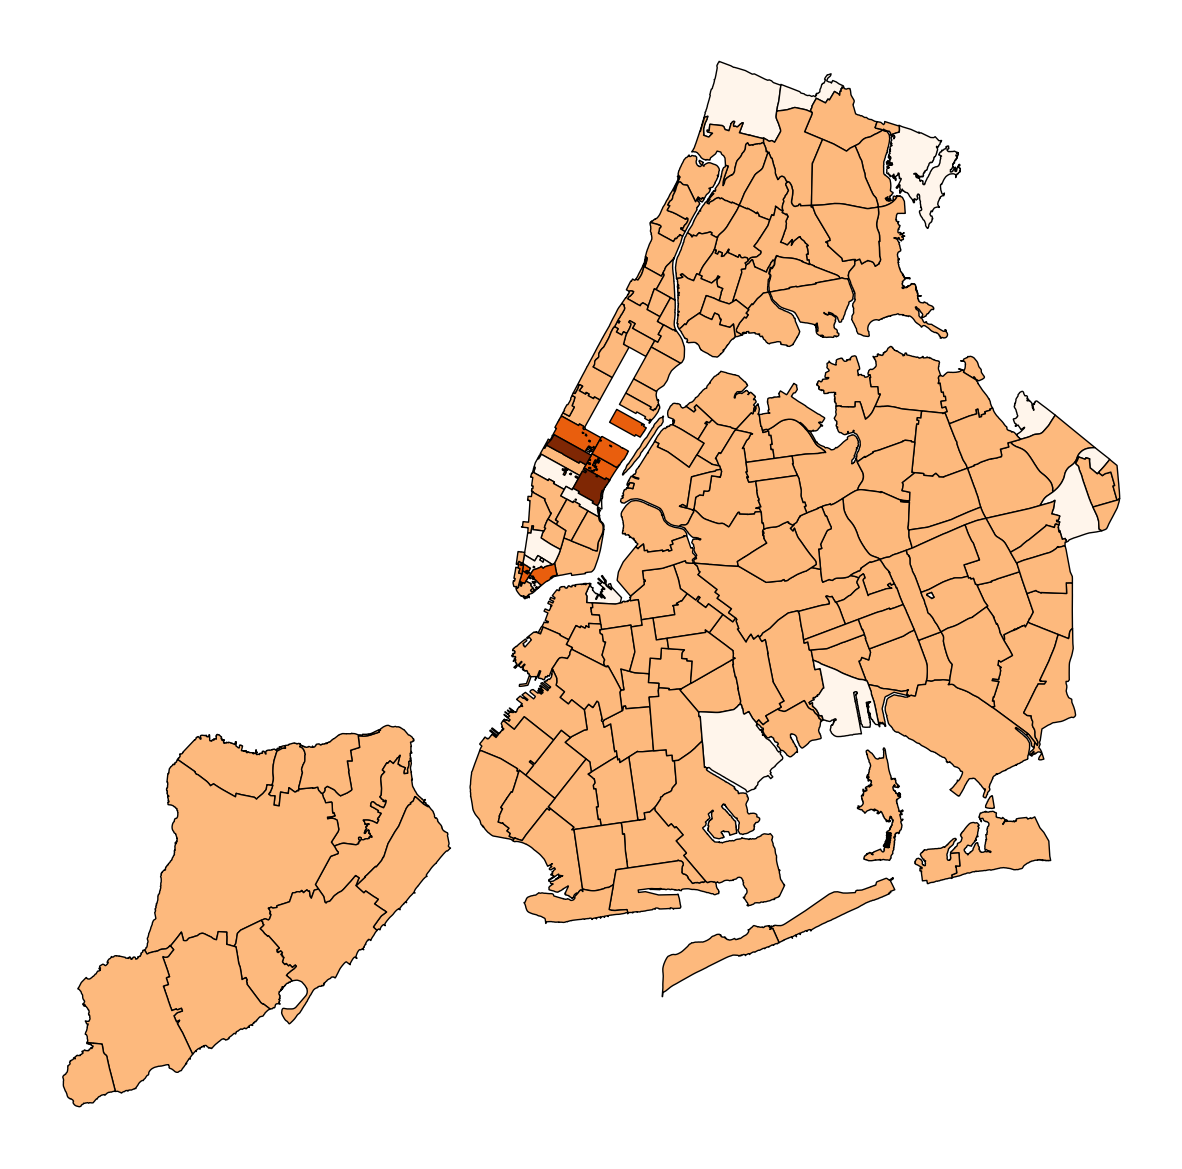

In [ ]:
clustersdf['cluster'] = db.labels_

#merge it with the geodataframe with the zipcode shapes- I am losing 1 zipcode...
mergednyz = nyczipsshp.merge(clustersdf, on='ZIPCODE', how='inner')
print("length of dataframes:",
      len(mergednyz.ZIPCODE),
      len(np.unique(clustersdf.ZIPCODE)), len(np.unique(nyczipsshp.ZIPCODE)))

fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_axes([0.05, 1.0, 1, 0.15])
cmap = mpl.cm.Oranges
norm = mpl.colors.Normalize(vmin=0, vmax=5)

bounds = range(4 + 1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb3 = mpl.colorbar.ColorbarBase(
    ax1,
    cmap=cmap,
    norm=norm,
    ticks=bounds,
    spacing='uniform',
    orientation='horizontal')
cb3.set_label('clusters', fontsize=30)
ax = plt.figure(figsize=(15, 15)).add_subplot(111)
mergednyz.plot(column='cluster', cmap='Oranges', alpha=1, ax=ax, ec='k')
tmp = ax.axis('off')

**Figure 11:** Clusters in Figure 10, geographicially plotted. Many zip codes determined to be outliers with the first set of parameters were then split into many clusters in the second set of parameters.

For eps = 3.5 and min_samples = 1:

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


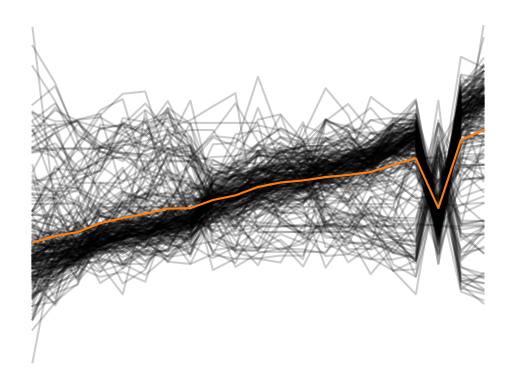

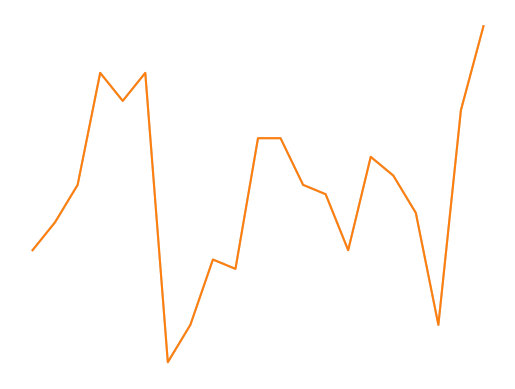

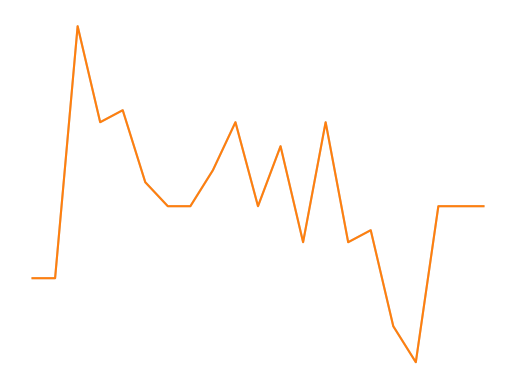

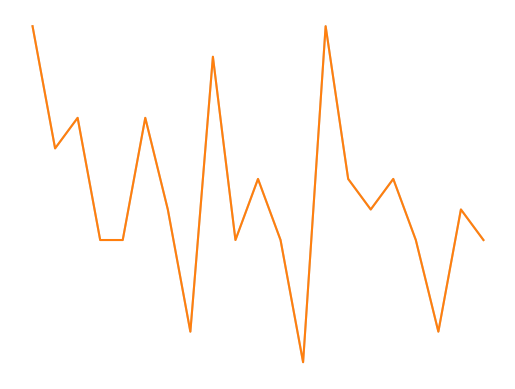

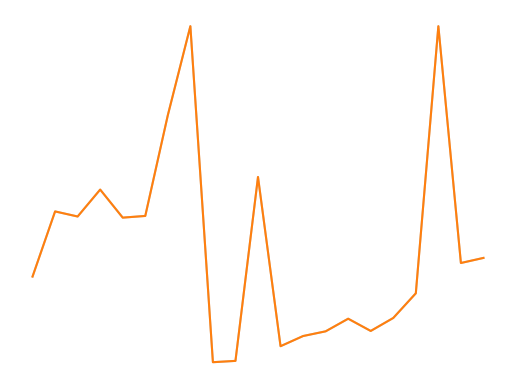

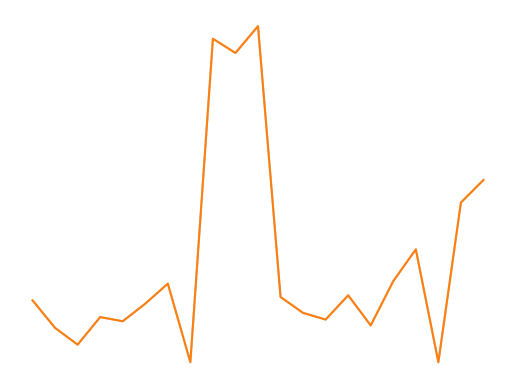

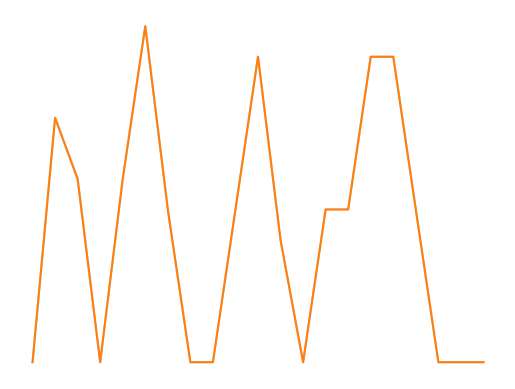

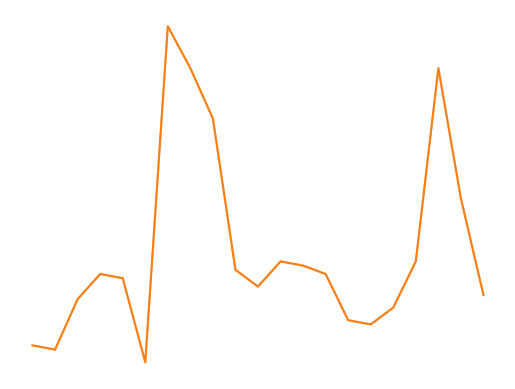

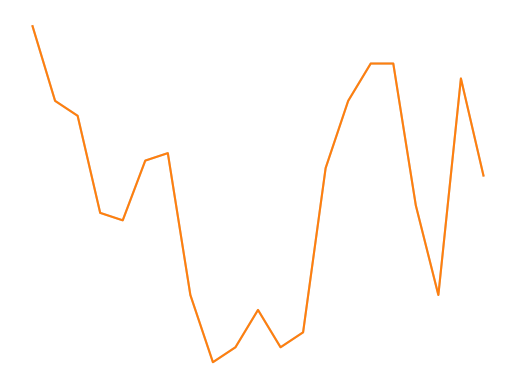

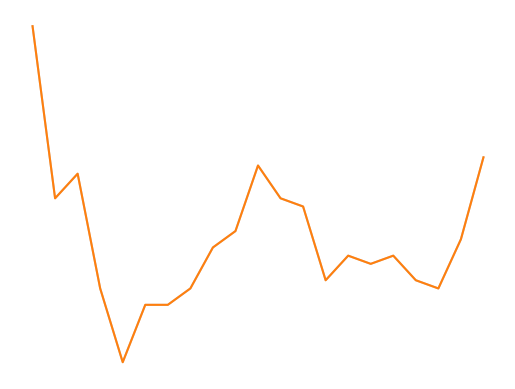

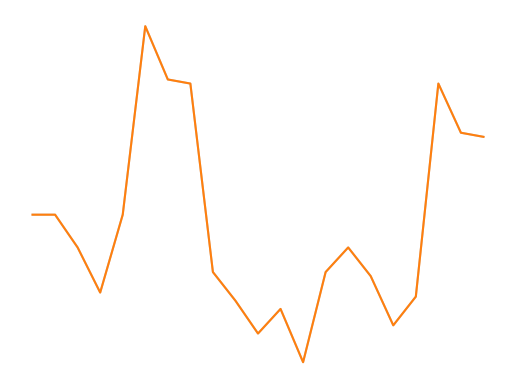

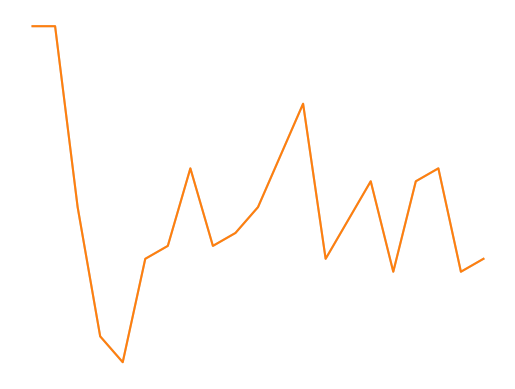

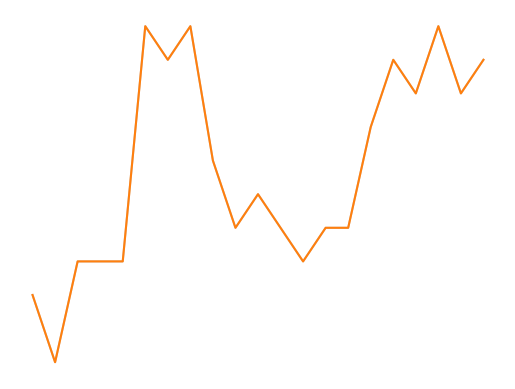

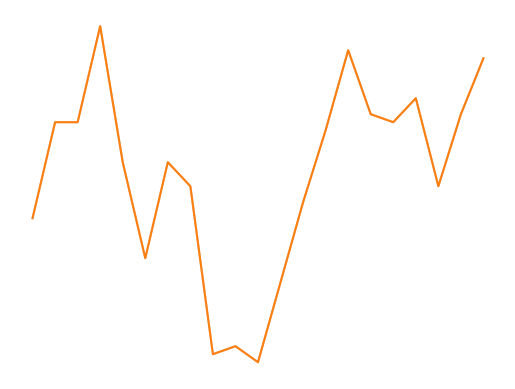

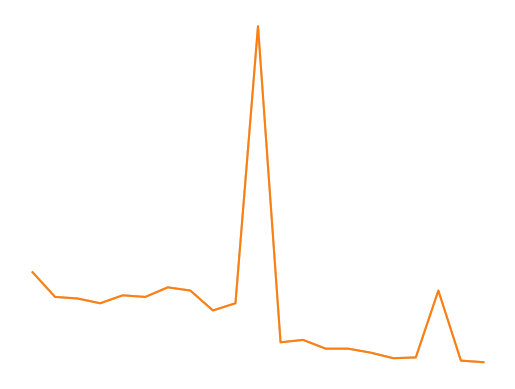

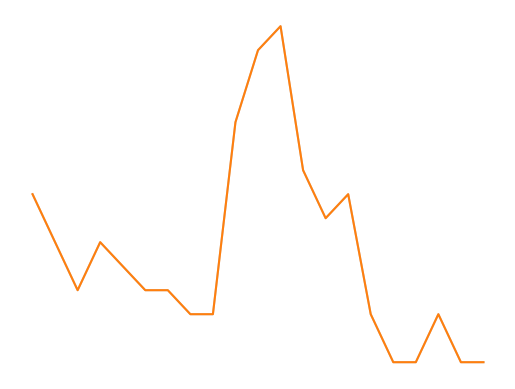

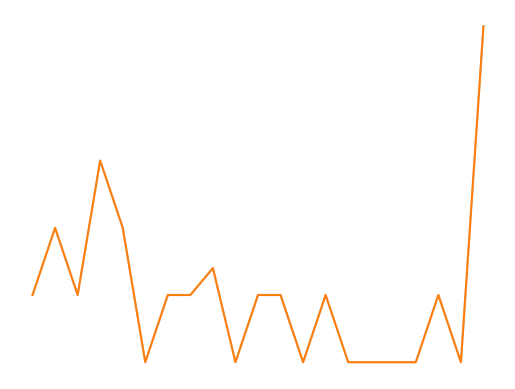

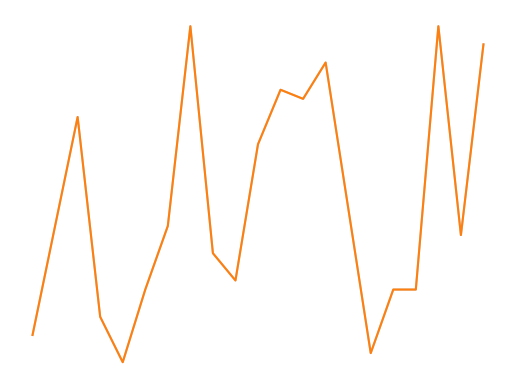

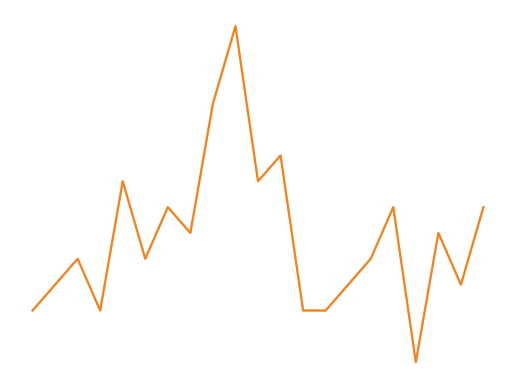

In [ ]:
db = DBSCAN(eps=3.5, min_samples=1).fit(vals)

# Get cluster labels
labels = db.labels_

# Add cluster labels to the DataFrame
vals_pd = pd.DataFrame(vals)
vals_pd['cluster'] = labels
print(vals_pd['cluster'].unique())

# Now you can analyze the clusters as you did with KMeans
# For example:
# Visualize clusters
# ax = vals_pd[vals_pd.cluster == -1].drop("cluster", axis=1).T.plot(legend=False, color="k", alpha=0.2)
for l in range(-1, vals_pd['cluster'].max()+1):
    if len(vals_pd[vals_pd.cluster == l]) == 0:
        continue

    vals_pd[vals_pd.cluster == l].drop("cluster", axis=1).T.plot(legend=False, color='black', alpha=0.2)

    cluster_data = vals_pd[vals_pd.cluster == l].drop("cluster", axis=1)
    cluster_center = cluster_data.mean(axis=0)
    plt.plot(cluster_center.values, color='tab:orange', alpha=1.0)
    plt.axis('off')
    plt.show()

    # cluster_center = vals_pd[vals_pd.cluster == l].mean(axis=0)  # Calculate the "center" of the cluster
    # axs[i].plot(cluster_center, color='tab:orange', alpha=1.0)  # Plot the cluster "center"

**Figure 12:** Similar to Figure 8, this plot shows the clustering by DBSCAN with parameters eps = 2.5 and min_sample = 1. A total of 18 clusters were found with these parameters. Again, with changing only a single parameter, wildly different results were produced. This shows the sensitivity of hierarchical clustering algorithms.

length of dataframes: 239 239 248


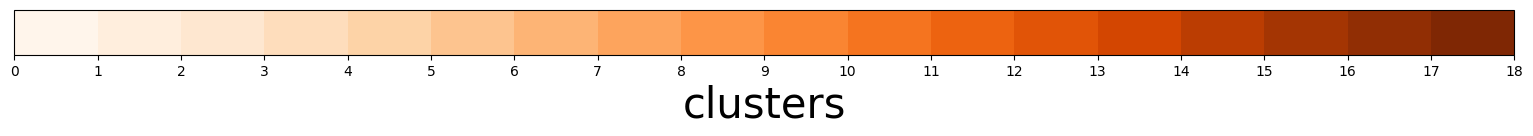

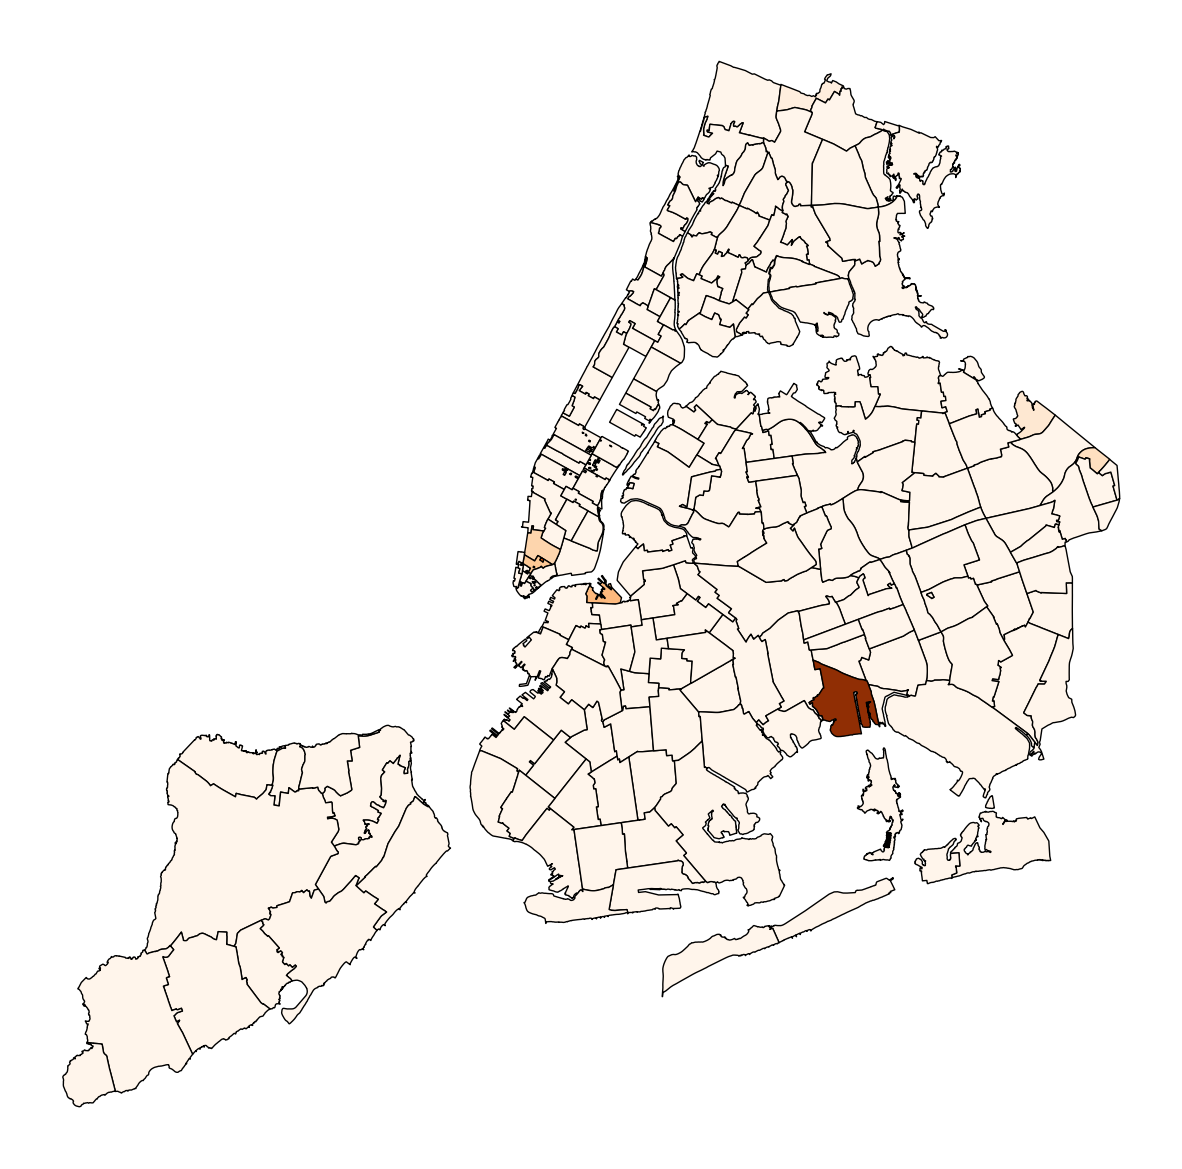

In [ ]:
clustersdf['cluster'] = db.labels_

#merge it with the geodataframe with the zipcode shapes- I am losing 1 zipcode...
mergednyz = nyczipsshp.merge(clustersdf, on='ZIPCODE', how='inner')
print("length of dataframes:",
      len(mergednyz.ZIPCODE),
      len(np.unique(clustersdf.ZIPCODE)), len(np.unique(nyczipsshp.ZIPCODE)))
fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_axes([0.05, 1.0, 1, 0.15])
cmap = mpl.cm.Oranges
norm = mpl.colors.Normalize(vmin=0, vmax=5)

bounds = range(18 + 1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb3 = mpl.colorbar.ColorbarBase(
    ax1,
    cmap=cmap,
    norm=norm,
    ticks=bounds,
    spacing='uniform',
    orientation='horizontal')
cb3.set_label('clusters', fontsize=30)
ax = plt.figure(figsize=(15, 15)).add_subplot(111)
mergednyz.plot(column='cluster', cmap='Oranges', alpha=1, ax=ax, ec='k')
tmp = ax.axis('off')

**Figure 13:** Clusters in Figure 12, geographically plotted. The new clusters seem to provide completely different results, with no single visibly predominating cluster. Many of the outlier time series seem to be in small clusters with only one or two members.

### Figure 9:
As figures 3, 5, 7 for hierarchical agglomerative clustering in 7 clusters, with smoothed time series

# If you want to use agglomerative clustering

In [ ]:
....

SyntaxError: invalid syntax (<ipython-input-259-7834bfc346aa>, line 1)

### And if you use hierarchical clustering in scipy you can make a dandrogram it may look like this:

In [ ]:
import scipy.cluster as scp
fig = plt.figure(figsize=(20,10), dpi=150)
plt.ylabel("distance")
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(vals, method='ward'),
                               labels = zipcodes,
                               leaf_rotation=90.,  # rotates the x axis labels
                               leaf_font_size=8.)  # font size for the x axis labels)


In [ ]:
!pwd